In [1]:
import pandas as pd
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords

### Concat all files together 

In [2]:
all_files = glob.glob("headlines_pages/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df['date'] = pd.to_datetime(df['date']) # sets format of "date" column as datetime
df = df[df['headline'].notna()].drop_duplicates().sort_values(by='date') 
df['keywords'] = df['keywords'].apply(literal_eval)
df

,headline,date,doc_type,material_type,section,keywords
0,"Boryana Straubel, 38, Dies; Founded a ‘Green’ Jewelry Company",2021-07-01,article,Obituary (Obit),NaN,"[Deaths (Obituaries), Philanthropy, Sustainable Living, Jewels and Jewelry]"
7,Joe Rogan Is Too Big to Cancel,2021-07-01,article,News,NaN,"[Comedy and Humor, Content Type: Personal Profile, Podcasts]"
6,"As Sales Climb, Automakers Struggle to Produce Enough Cars",2021-07-02,article,News,NaN,"[Company Reports, Automobiles, Electric and Hybrid Vehicles, Shortages]"
7,And the Trumps Themselves?,2021-07-02,article,briefing,NaN,[]
2,Tesla Says Autopilot Makes Its Cars Safer. Crash Victims Say It Kills.,2021-07-05,article,News,NaN,"[Traffic Accidents and Safety, Driverless and Semiautonomous Vehicles, Electric and Hybrid Vehic..."
...,...,...,...,...,...,...
0,DeSantis Set to Announce 2024 Run on Twitter With Elon Musk,2023-05-23,article,News,NaN,"[Presidential Election of 2024, Social Media, United States Politics and Government]"
1,Your Wednesday Briefing,2023-05-24,article,News,NaN,[]
3,The DeSantis Delusion,2023-05-24,article,Op-Ed,NaN,"[Presidential Election of 2024, Primaries and Caucuses, United States Politics and Government, P..."
1,"A.I. Needs an International Watchdog, ChatGPT Creators Say",2023-05-24,article,News,NaN,"[Politics and Government, Computers and the Internet, Artificial Intelligence, Regulation and De..."


In [6]:
start_date = pd.to_datetime('2022-04-10')
end_date = pd.to_datetime('2022-11-12')

df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

df

,headline,date,doc_type,material_type,section,keywords,sentiment,article_date,week,month
8,Twitter Grapples With an Elon Musk Problem,2022-04-11,article,News,NaN,"[Social Media, Computers and the Internet, Stocks and Bonds, Shareholder Rights and Activism, Bo...",-0.2732,2022-04-11,2022-04-11/2022-04-17,2022-04
7,Elon Musk Backs Out,2022-04-11,article,News,NaN,"[Social Media, Politics and Government, Philanthropy, High Net Worth Individuals, Mergers, Acqui...",0.0000,2022-04-11,2022-04-11/2022-04-17,2022-04
5,"Elon Musk Will Not Join Twitter’s Board, Company Says",2022-04-11,article,News,NaN,"[Social Media, Computers and the Internet, Boards of Directors]",0.0000,2022-04-11,2022-04-11/2022-04-17,2022-04
3,Truck Makers Face a Tech Dilemma: Batteries or Hydrogen?,2022-04-11,article,News,NaN,"[Batteries, Trucks and Trucking, Hydrogen, Electric and Hybrid Vehicles, Fuel Efficiency]",0.0000,2022-04-11,2022-04-11/2022-04-17,2022-04
4,More Companies Take a Stand on Abortion,2022-04-12,article,News,NaN,[Abortion],0.0000,2022-04-12,2022-04-11/2022-04-17,2022-04
...,...,...,...,...,...,...,...,...,...,...
5,Tough Lines on Ukraine and China: Seeing Policy Fallout From U.S. Election,2022-11-10,article,News,NaN,[Midterm Elections (2022)],0.0000,2022-11-10,2022-11-07/2022-11-13,2022-11
6,A Verifiable Mess: Twitter Users Create Havoc by Impersonating Brands,2022-11-11,article,News,NaN,"[Social Media, Rumors and Misinformation, Hoaxes and Pranks, Mergers, Acquisitions and Divestitu...",0.0000,2022-11-11,2022-11-07/2022-11-13,2022-11
7,Regulators Begin Cracking Down on FTX,2022-11-11,article,News,NaN,[],0.0000,2022-11-11,2022-11-07/2022-11-13,2022-11
0,Two Weeks of Chaos: Inside Elon Musk’s Takeover of Twitter,2022-11-11,article,News,NaN,"[Social Media, Online Advertising, Layoffs and Job Reductions, Computers and the Internet, Appoi...",0.5423,2022-11-11,2022-11-07/2022-11-13,2022-11


### Run sentiment analysis

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Get the headline and keywords
    headline = row['headline']
    keywords = row['keywords']
    
    # Combine the headline and keywords into one string
    text = headline + ' ' + ' '.join(keywords)
    # Check if "s&p 500" is in the text
    if "tesla" not in text.lower():
        continue

    
    # Get the sentiment score for the text
    sentiment = sia.polarity_scores(text)['compound']
    # Add the sentiment score to the DataFrame
    df.at[index, 'sentiment'] = sentiment
# Add a new column to the DataFrame for the date of the article
df['article_date'] = pd.to_datetime(df['date']).dt.date

# Group the DataFrame by article date and aggregate the sentiment scores
sentiment_by_day = df.groupby('article_date')['sentiment'].mean()

df['week'] = pd.to_datetime(df['date']).dt.to_period('W')
sentiment_by_week = df.groupby('week')['sentiment'].mean()


df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
sentiment_by_month = df.groupby('month')['sentiment'].mean()


sentiment_by_week

/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_36442/4038182442.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article_date'] = pd.to_datetime(df['date']).dt.date
/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_36442/4038182442.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = pd.to_datetime(df['date']).dt.to_period('W')
/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_36442/4038182442.py:33: SettingWithCopyWarning: 
A value is trying to be set on a

week
2022-04-11/2022-04-17   -0.013536
2022-04-18/2022-04-24    0.031850
2022-04-25/2022-05-01    0.055304
2022-05-02/2022-05-08    0.089070
2022-05-09/2022-05-15    0.004107
2022-05-16/2022-05-22    0.037860
2022-05-23/2022-05-29    0.101529
2022-05-30/2022-06-05   -0.044382
2022-06-06/2022-06-12    0.037774
2022-06-13/2022-06-19    0.039169
2022-06-20/2022-06-26    0.004200
2022-06-27/2022-07-03    0.219712
2022-07-04/2022-07-10    0.167880
2022-07-11/2022-07-17    0.030145
2022-07-18/2022-07-24   -0.015282
2022-07-25/2022-07-31   -0.014978
2022-08-01/2022-08-07   -0.012935
2022-08-08/2022-08-14    0.126020
2022-08-15/2022-08-21   -0.024733
2022-08-22/2022-08-28    0.290480
2022-08-29/2022-09-04    0.102780
2022-09-05/2022-09-11    0.220475
2022-09-12/2022-09-18   -0.004060
2022-09-19/2022-09-25   -0.255475
2022-09-26/2022-10-02   -0.026812
2022-10-03/2022-10-09    0.036279
2022-10-10/2022-10-16   -0.079329
2022-10-17/2022-10-23    0.102233
2022-10-24/2022-10-30    0.176056
2022-10-3

### Sentiment by Day

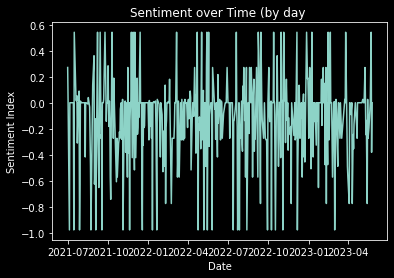

In [6]:
import matplotlib.pyplot as plt

plt.plot(sentiment_by_day.index, sentiment_by_day.values)
plt.xlabel('Date')
plt.ylabel('Sentiment Index')
plt.title('Sentiment over Time (by day ')
plt.show()
april10 november 6th - 12th 2022

### Sentiment by Week

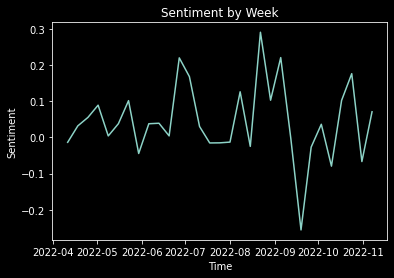

In [8]:
# plot sentiment by week with time as the x value
plt.plot(sentiment_by_week.index.to_timestamp(), sentiment_by_week.values)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment by Week')
plt.show()

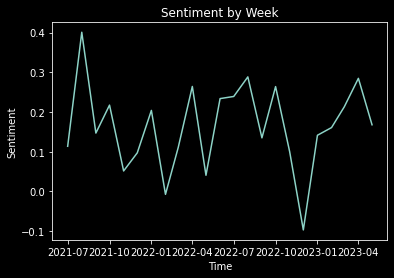

In [16]:
# plot sentiment by month with time as the x value
plt.plot(sentiment_by_month.index.to_timestamp(), sentiment_by_month.values)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment by Month')
plt.show()